<a href="https://colab.research.google.com/github/MRCheww/Data_Analysis/blob/main/Human_Resource_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Human Resource Analytics

In [126]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv("https://raw.githubusercontent.com/tanlitung/Datasets/master/HR_comma_sep.csv")

# Descriptive Data

In [127]:
df.head() # Display first 5 rows

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [128]:
df.tail(6) # Display last 6 rows

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
14993,0.76,0.83,6,293,6,0,1,0,support,low
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [129]:
df.shape # Display number of rows and column

(14999, 10)

In [130]:
df.isnull().sum() # Check the total number of null values

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [131]:
df.describe() # Summary statistics of the numerical fields

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [132]:
df['satisfaction_level'].describe() # Summary statistics of the selected field

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [133]:
df.corr() # Summary correlationship of numerical field

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [134]:
df.info() # Infomation of dataframes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [135]:
# Check for outliers for categorical data
print('Department        : ',df['department'].unique())
print('Salary            : ',df['salary'].unique())
print('Left              : ',df['left'].unique())

Department        :  ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
Salary            :  ['low' 'medium' 'high']
Left              :  [1 0]


# Data Cleaning

In [136]:
# Remove satisfaction_level column as last_evaluation is the latest.
df = df.drop(['satisfaction_level'], axis=1) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   last_evaluation        14999 non-null  float64
 1   number_project         14999 non-null  int64  
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   work_accident          14999 non-null  int64  
 5   left                   14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
dtypes: float64(1), int64(6), object(2)
memory usage: 1.0+ MB


# Distribution Analysis

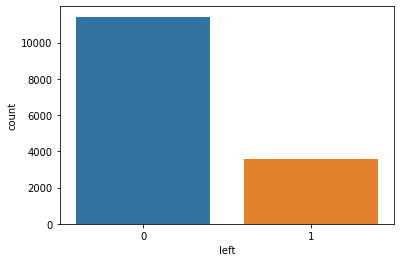

In [137]:
sb.countplot(data = df, x = 'left');

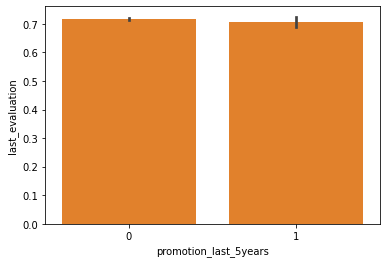

In [138]:
sb.barplot(data = df, x = 'promotion_last_5years', y = 'last_evaluation', color = base_color) # Satisfaction level last evaluation

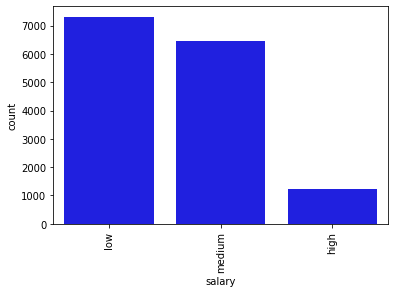

In [139]:
sb.countplot(data = df, x = 'salary', color = 'blue')
plt.xticks(rotation = 90);

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 <a list of 10 Text major ticklabel objects>)

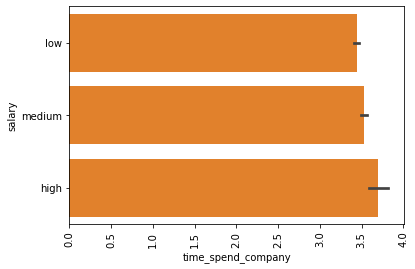

In [140]:
base_color = sb.color_palette()[1]
sb.barplot(data = df, x = 'time_spend_company', y = 'salary', color = base_color)
plt.xticks(rotation=90)

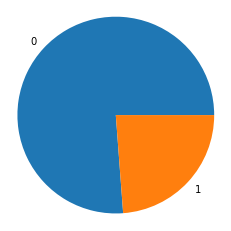

In [141]:
sorted_counts = df['left'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index);
plt.axis('square');

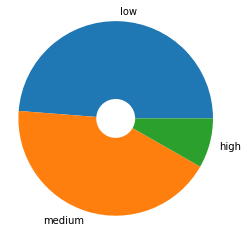

In [142]:
sorted_counts = df['salary'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, wedgeprops = {'width' : 0.8});
plt.axis('square');

(array([ 179.,  172.,  209.,  676., 1030., 1341.,  880.,  710.,  704.,
         668.,  824.,  694.,  717.,  706.,  761., 1209.,  844.,  825.,
         770., 1080.]),
 array([0.36 , 0.392, 0.424, 0.456, 0.488, 0.52 , 0.552, 0.584, 0.616,
        0.648, 0.68 , 0.712, 0.744, 0.776, 0.808, 0.84 , 0.872, 0.904,
        0.936, 0.968, 1.   ]),
 <a list of 20 Patch objects>)

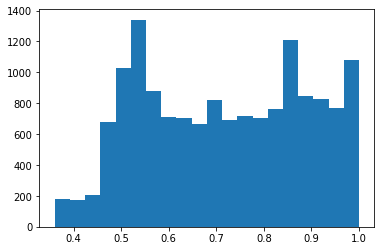

In [143]:
plt.hist(data = df, x = 'last_evaluation', bins = 20)

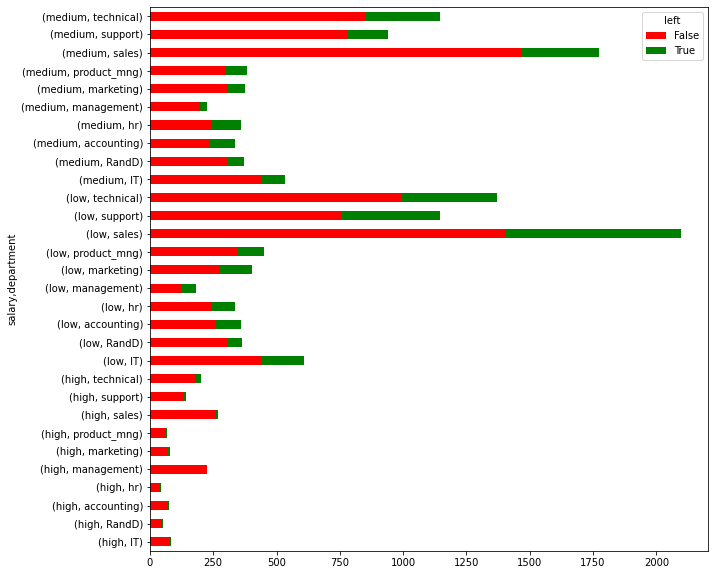

In [144]:
stack = pd.crosstab([df.salary, df.department], df.left.astype(bool))
stack.plot(kind='barh', stacked=True, color=['red','green'], grid=False, figsize=(10,10))
# stack.plot.barh(stacked=True, color=['red','blue'], grid=False, figsize=(10,10))
plt.show()

# Conclusion
- Employees's of Department Sales most probably won't leave the company.
- The longer the time spend in company, the higher the salary.
- Most of the employees were satisfied with the company as more than 75% gives the value > 0.5.
- Employees were not satisfied for the promotion last 5 years are slightly higher.